In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic_data = pd.read_csv('data/train.csv')

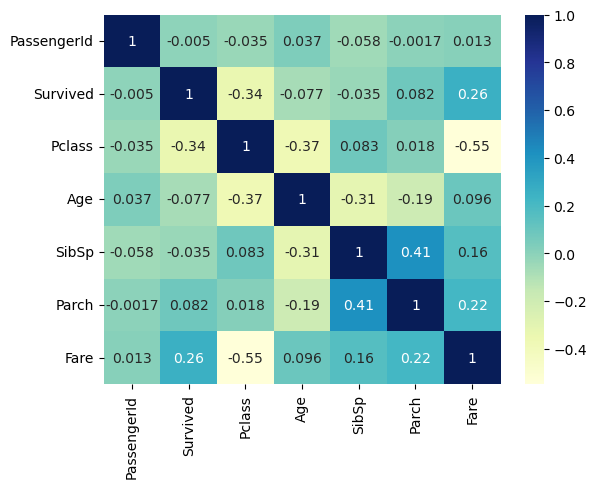

In [4]:
import seaborn as sns
# Use numeric_only=True to avoid errors from non-numeric columns
corr_matrix = titanic_data.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit (n_splits=1, test_size=0.2)
for train_indices, test_indices in split. split (titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):strat_train_set = titanic_data.loc [train_indices]
strat_test_set = titanic_data.loc [test_indices]

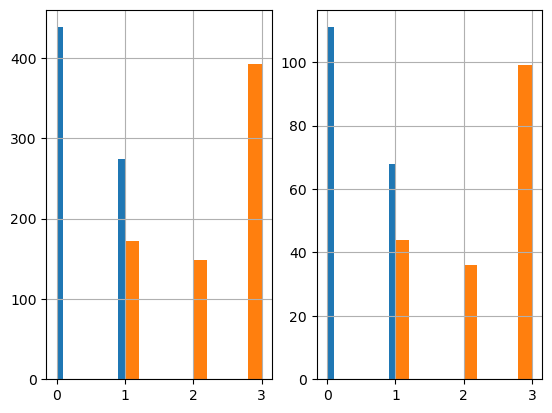

In [6]:
plt.subplot (1,2,1)
strat_train_set [ 'Survived'].hist()
strat_train_set ['Pclass'].hist()
plt.subplot (1,2,2)
strat_test_set ['Survived'].hist()
strat_test_set ['Pclass'].hist()
plt.show()

In [7]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 725 to 15
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C", "S", "Q", "N"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X


In [10]:
class FeatureDropper (BaseEstimator, TransformerMixin) :
      def fit (self, X, y=None) :
          return self
      def transform(self, X) :
          return X.drop ( ["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [11]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [12]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [13]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
725,726,0,3,20.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
604,605,1,1,35.000000,0,0,26.5500,1.0,0.0,0.0,0.0,1.0
324,325,0,3,29.660402,8,2,69.5500,0.0,0.0,1.0,0.0,1.0
693,694,0,3,25.000000,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
363,364,0,3,35.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
226,227,1,2,19.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
824,825,0,3,2.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
74,75,1,3,32.000000,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
349,350,0,3,42.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0


In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 725 to 15
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [15]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
param_gird = [
{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit (X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [17]:
final_clf = grid_search.best_estimator_

In [18]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [19]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [20]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
240,241,0,3,29.85507,1,0,14.4542,1.0,0.0,0.0,1.0,0.0
81,82,1,3,29.00000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
874,875,1,2,28.00000,1,0,24.0000,1.0,0.0,0.0,1.0,0.0
512,513,1,1,36.00000,0,0,26.2875,0.0,0.0,1.0,0.0,1.0
850,851,0,3,4.00000,4,2,31.2750,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
354,355,0,3,29.85507,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
548,549,0,3,33.00000,1,1,20.5250,0.0,0.0,1.0,0.0,1.0
654,655,0,3,18.00000,0,0,6.7500,0.0,1.0,0.0,1.0,0.0
609,610,1,1,40.00000,0,0,153.4625,0.0,0.0,1.0,1.0,0.0


In [21]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set ['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [22]:
final_clf.score(X_data_test, y_data_test)

0.8435754189944135

In [23]:
final_data = pipeline.fit_transform(titanic_data)

In [24]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [25]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy ()

In [26]:
prod_clf = RandomForestClassifier()
param_gird = [
{"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]
grid_search = GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [27]:
prod_final_clf = grid_search.best_estimator_

In [28]:
prod_final_clf

RandomForestClassifier(min_samples_split=3)

In [29]:
titanic_test_data = pd.read_csv("data/test.csv")

In [30]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [31]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [32]:
X_final_test = final_test_data
X_final_test = X_final_test.ffill()

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [33]:
predictions = prod_final_clf.predict(X_data_final_test)

In [34]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("data/predictions.csv", index=False)

In [35]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


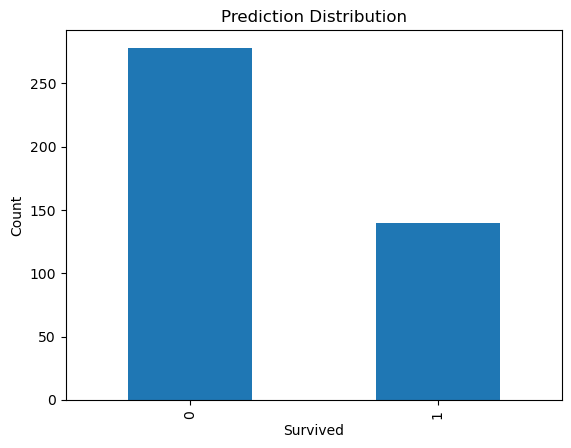

In [77]:
final_df['Survived'].value_counts().plot(kind='bar', title='Prediction Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()